# "I'm The King of the World! Or Almost...". Predicting Titanic Passengers' Fate through Machine Learning

# Introduction

"Which passengers were more likely to survive?"

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

# Loading the Data

In [2]:
# Reading in the datasets
train_df = pd.read_csv("~/Desktop/repos/U_JUMP_I_JUMP_JACK/train.csv")
test_df = pd.read_csv("~/Desktop/repos/U_JUMP_I_JUMP_JACK/test.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Dealing With Missing Values

In [3]:
# Identifying and plotting missing values
def missingdata(data):
    total = (
        data.isnull().sum().sort_values(ascending=False)
    )  
    percent = (data.isnull().sum() / data.isnull().count() * 100).sort_values(
        ascending=False
    )  
    ms = pd.concat(
        [total, percent], axis=1, keys=["Total", "Percent"]
    )  
    ms = ms[
        ms["Percent"] > 0
    ] 
    f, ax = plt.subplots(figsize=(8, 6))
    plt.xticks(rotation="90")  
    fig = sns.barplot(
        ms.index, ms["Percent"], color="green", alpha=0.8
    ) 
    plt.xlabel("Features", fontsize=15)  
    plt.ylabel("Percent of missing values", fontsize=15)  
    plt.title(
        "Percent missing data by feature", fontsize=15
    )  
    return ms

,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


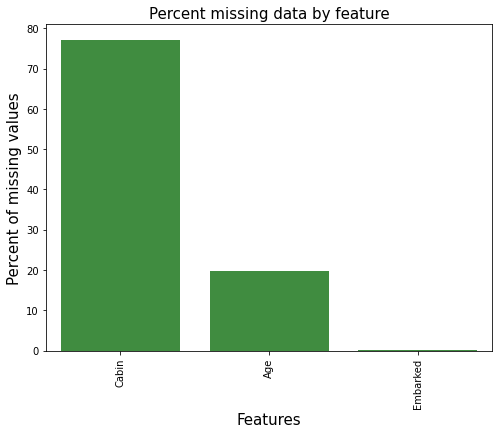

In [4]:
# Identifying missing values in the training set
missingdata(train_df)

,Total,Percent
Cabin,327,78.229665
Age,86,20.574163
Fare,1,0.239234


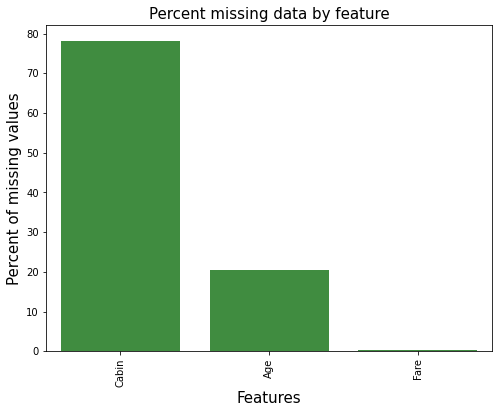

In [5]:
missingdata(test_df)

## Missing Values in the Training Set

In [6]:
# Filling missing values in the training set
train_df["Embarked"].fillna(train_df["Embarked"].mode()[0], inplace=True)
train_df["Age"].fillna(train_df["Age"].median(), inplace=True)

In [ ]:
# Dropping unnecessary columns
drop_column_training_set = ["Cabin", "Ticket"]
train_df.drop(drop_column_training_set, axis=1, inplace=True)

## Missing Values in the Test Set

In [7]:
# Replacing missing values with median
test_df["Age"].fillna(train_df["Age"].median(), inplace=True)
test_df["Fare"].fillna(train_df["Fare"].median(), inplace=True)

In [ ]:
# Dropping unnecessary columns
drop_column_test_set = ["Cabin", "Ticket"]
test_df.drop(drop_column_test_set, axis=1, inplace=True)

In [8]:
# Checking for remaining missing values 
print("check the nan value in train data")
print(train_df.isnull().sum())
print("___" * 30)
print("check the nan value in test data")
print(test_df.isnull().sum())

check the nan value in train data
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
__________________________________________________________________________________________
check the nan value in test data
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


## Training First Model 

In [9]:
from sklearn.ensemble import RandomForestClassifier

y = train_df["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch", "Age"]

# Converting categorical into indicator values 
X = pd.get_dummies(train_df[features]) 
X_test = pd.get_dummies(test_df[features]) 

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y) 
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


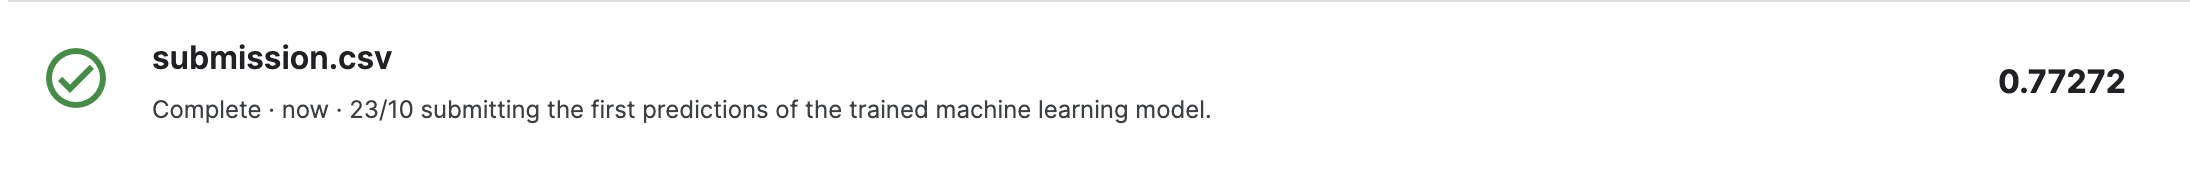

In [10]:
# Displaying result of first trained model
from IPython.display import Image
Image("titanic_model_pred_1.png")

# Feature Engineering

In [11]:
# Combining datasets 
all_data = [train_df, test_df]

In [12]:
# Creating a new feature to combine SibSp and Parch
for dataset in all_data:
    dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"] + 1

# Dropping SibSp and Parch
drop_column = ["SibSp", "Parch"]

for dataset in all_data:
    dataset.drop(drop_column, axis=1, inplace=True)

In [13]:
# Creating a Title feature 
for dataset in all_data:
    dataset["Title"] = dataset.Name.str.extract(
        " ([A-Za-z]+)\.", expand=False
    )  # Extracting titles from name column and adding them to a new column called 'Title' - using a regex 
    dataset["Title"] = dataset["Title"].replace(
        [
            "Lady",
            "Countess",
            "Capt",
            "Col",
            "Don",
            "Dr",
            "Major",
            "Rev",
            "Sir",
            "Jonkheer",
            "Dona",
            "Master",
        ],
        "Rare",
    ) 
    dataset["Title"] = dataset["Title"].replace(
        "Mlle", "Miss"
    )  
    dataset["Title"] = dataset["Title"].replace(
        "Ms", "Miss"
    ) 
    dataset["Title"] = dataset["Title"].replace(
        "Mme", "Mrs"
    )  

# Dropping the Name column 
drop_columns = ["Name"]
for dataset in all_data:
    dataset.drop(drop_columns, axis=1, inplace=True)

In [14]:
# Converting the categorical titles to ordinal
title_mapping = {
    "Mr": 1,
    "Miss": 2,
    "Mrs": 3,
    "Rare": 4,
}  
for dataset in all_data:
    dataset["Title"] = dataset["Title"].map(
        title_mapping
    )  

train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
0,1,0,3,male,22.0,7.2500,S,2,1
1,2,1,1,female,38.0,71.2833,C,2,3
2,3,1,3,female,26.0,7.9250,S,1,2
3,4,1,1,female,35.0,53.1000,S,2,3
4,5,0,3,male,35.0,8.0500,S,1,1


In [15]:
# Converting the Sex feature to numerical values
for dataset in all_data:
    dataset["Sex"] = (
        dataset["Sex"].map({"female": 1, "male": 0}).astype(int)
    )  # changing the data type from string to integer

train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
0,1,0,3,0,22.0,7.2500,S,2,1
1,2,1,1,1,38.0,71.2833,C,2,3
2,3,1,3,1,26.0,7.9250,S,1,2
3,4,1,1,1,35.0,53.1000,S,2,3
4,5,0,3,0,35.0,8.0500,S,1,1


In [16]:
# Creating bins for age features
for dataset in all_data:
    dataset["Age Bin"] = pd.cut(dataset["Age"], bins=[0, 16, 32, 48, 64])

for dataset in all_data:
    dataset.loc[dataset["Age"] <= 16, "Age"] = 0
    dataset.loc[(dataset["Age"] > 16) & (dataset["Age"] <= 32), "Age"] = 1
    dataset.loc[(dataset["Age"] > 32) & (dataset["Age"] <= 48), "Age"] = 2
    dataset.loc[(dataset["Age"] > 48) & (dataset["Age"] <= 64), "Age"] = 3
    dataset.loc[dataset["Age"] > 64, "Age"] = 4

In [17]:
# Dropping the Age Bin column
drop_columns = ["Age Bin"]
for dataset in all_data:
    dataset.drop(drop_columns, axis=1, inplace=True)

train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
0,1,0,3,0,1.0,7.2500,S,2,1
1,2,1,1,1,2.0,71.2833,C,2,3
2,3,1,3,1,1.0,7.9250,S,1,2
3,4,1,1,1,2.0,53.1000,S,2,3
4,5,0,3,0,2.0,8.0500,S,1,1


In [18]:
# Dealing with the Fare feature 
for dataset in all_data:
    dataset["Fare"] = dataset["Fare"].round(
        1
    )  
    dataset["Fare Bin"] = pd.cut(
        dataset["Fare"],
        bins=[0, 7.91, 14.45, 31, 120],
        labels=["Low Fare", "Median Fare", "Average Fare", "High Fare"],
    )  # Creating bins for fare features
# Converting the Fare feature into ordinal values 
for dataset in all_data:
    dataset.loc[dataset["Fare"] <= 7.91, "Fare"] = 0
    dataset.loc[(dataset["Fare"] > 7.91) & (dataset["Fare"] <= 14.454), "Fare"] = 1
    dataset.loc[(dataset["Fare"] > 14.454) & (dataset["Fare"] <= 31), "Fare"] = 2
    dataset.loc[dataset["Fare"] > 31, "Fare"] = 3
    dataset["Fare"] = dataset["Fare"].astype(int)

# Dropping the Fare Bin column 
drop_columns = ["Fare Bin"]
for dataset in all_data:
    dataset.drop(drop_columns, axis=1, inplace=True)
    
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
0,1,0,3,0,1.0,0,S,2,1
1,2,1,1,1,2.0,3,C,2,3
2,3,1,3,1,1.0,0,S,1,2
3,4,1,1,1,2.0,3,S,2,3
4,5,0,3,0,2.0,1,S,1,1


In [19]:
# Converting the categorical feature of Embarked to numeric
for dataset in all_data:
    dataset["Embarked"] = dataset["Embarked"].map({"S": 0, "C": 1, "Q": 2}).astype(int)

train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
0,1,0,3,0,1.0,0,0,2,1
1,2,1,1,1,2.0,3,1,2,3
2,3,1,3,1,1.0,0,0,1,2
3,4,1,1,1,2.0,3,0,2,3
4,5,0,3,0,2.0,1,0,1,1


In [20]:
# Copying both datasets
copy_train_df = train_df
copy_test_df = test_df

In [21]:
combined = [copy_train_df, copy_test_df]

## Training Second Model 

In [22]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train = copy_train_df.drop("Survived", axis=1)  
Y_train = copy_train_df["Survived"]  

X_train, X_val, Y_train, Y_val = train_test_split(
    X_train, Y_train, test_size=0.25, random_state=1
)  

In [23]:
# Instantiating and fitting the model 
x_features = ['Pclass'] 

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train[x_features], Y_train) 

# predicting the survival rate of the validation dataset 
y_val_preds = model.predict(X_val[x_features]) 

In [24]:
# comparing the predicted value with the actual value
from sklearn.metrics import accuracy_score

accuracy_score(Y_val, y_val_preds) 

0.6681614349775785

In [25]:
# Listing all features
all_features = [ 
    'Pclass',
    'Sex',
    'Age',
    'Fare',
    'Embarked',
    'FamilySize',
    'Title'
]

In [26]:
# Applying feature selection using sequential feature Selector
features_to_use = [] 

while len(all_features) > 0: 
    
    feature_performance = {} 
    
    for feature in all_features: 
        model = RandomForestClassifier() 
        model.fit(X_train[features_to_use + [feature]], Y_train)
        y_val_preds = model.predict(X_val[features_to_use + [feature]]) 
        feature_performance[feature] = accuracy_score(Y_val, y_val_preds) 
    
    feature_max = max(feature_performance, key=feature_performance.get) 
    features_to_use.append(feature_max)  
    all_features.remove(feature_max) 
    print(features_to_use, max(feature_performance.values()))

['Sex'] 0.7847533632286996
['Sex', 'FamilySize'] 0.7892376681614349
['Sex', 'FamilySize', 'Age'] 0.7937219730941704
['Sex', 'FamilySize', 'Age', 'Title'] 0.7892376681614349
['Sex', 'FamilySize', 'Age', 'Title', 'Pclass'] 0.7892376681614349
['Sex', 'FamilySize', 'Age', 'Title', 'Pclass', 'Fare'] 0.8116591928251121
['Sex', 'FamilySize', 'Age', 'Title', 'Pclass', 'Fare', 'Embarked'] 0.7713004484304933


In [27]:
# Inserting best features into a list 
best_features = ['Sex', 'Fare', 'Pclass', 'FamilySize']

In [28]:
# Fitting the model 
best_model = RandomForestClassifier()

best_model.fit(copy_train_df[best_features], copy_train_df["Survived"])

RandomForestClassifier()

In [29]:
# Making predictions
y_test_preds = best_model.predict(copy_test_df[best_features])

In [30]:
# Exploring the output 
output = pd.DataFrame({"PassengerId": copy_test_df.PassengerId, "Survived": y_test_preds})
output.to_csv("submission.csv", index=False)

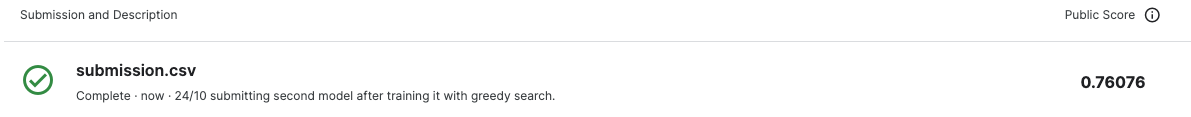

In [31]:
# Displaying result of second trained model
from IPython.display import Image
Image("titanic_model_pred_2.png")